In [17]:
import json
import nltk
from nltk.translate.bleu_score import sentence_bleu
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import spacy


%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Step 1: Load the data from JSON
with open('results4.json', 'r') as json_file:
    data = json.load(json_file)

In [19]:
# Initialize lists to store existing and generated texts
existing_texts = []
generated_texts = []

In [21]:
# Step 2: Define Evaluation Metrics
bleu_scores = []
x_labels = []
for entry in data:
    reference = entry['existing_text']
    generated = entry['generated_text1']
    reference_tokens = nltk.word_tokenize(reference.lower())
    generated_tokens = nltk.word_tokenize(generated.lower())
    bleu_score = sentence_bleu([reference_tokens], generated_tokens)
    bleu_scores.append(bleu_score)
    x_labels.append(f"Author {len(x_labels) + 1}")

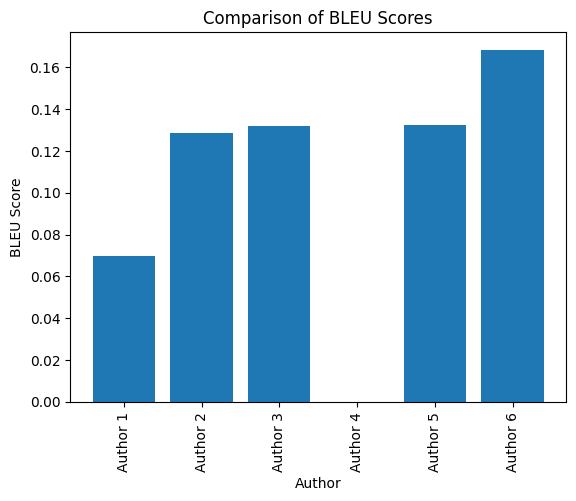

In [22]:
# Step 3: Visualize the results
plt.bar(x_labels, bleu_scores)
plt.xlabel("Author")
plt.ylabel("BLEU Score")
plt.title("Comparison of BLEU Scores")
plt.xticks(rotation=90)
plt.show()

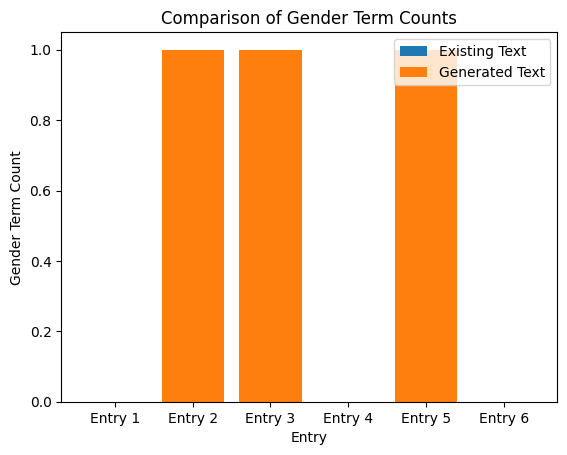

In [24]:

existing_texts = [entry['existing_text'] for entry in data]
generated_texts = [entry['generated_text1'] for entry in data]

# Step 2: Perform Gender Term Detection
def detect_gender_terms(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    gender_terms = ['he', 'him', 'his', 'she', 'her', 'hers', 'they']
    term_count = sum(1 for token in doc if token.text.lower() in gender_terms)
    return term_count

existing_gender_terms = [detect_gender_terms(text) for text in existing_texts]
generated_gender_terms = [detect_gender_terms(text) for text in generated_texts]

# Step 3: Visualize the Gender Term Counts
labels = [f"Entry {i+1}" for i in range(len(data))]

x = range(len(data))
plt.bar(x, existing_gender_terms, label='Existing Text')
plt.bar(x, generated_gender_terms, label='Generated Text')

plt.xlabel('Entry')
plt.ylabel('Gender Term Count')
plt.title('Comparison of Gender Term Counts')
plt.xticks(x, labels)
plt.legend()
plt.show()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

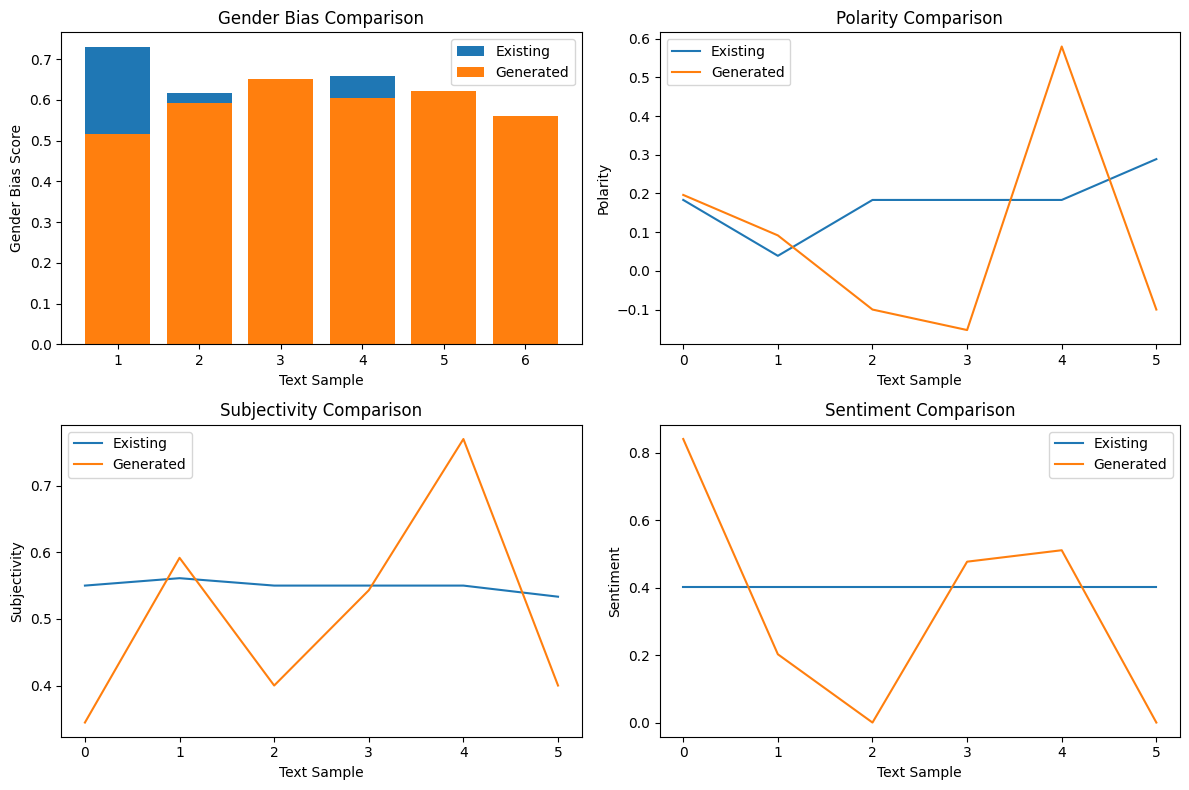

In [12]:

# Step 2: Perform Gender Bias Detection
def detect_gender_bias(text):
    # Load the gender bias detection model (e.g., BERT or GPT-3) and tokenize the input
    model = pipeline('text-classification', model='bert-base-uncased')
    result = model(text)[0]  # Assuming single-text classification
    label = result['label']
    score = result['score']
    return label, score

existing_gender_bias = [detect_gender_bias(text) for text in existing_texts]
generated_gender_bias = [detect_gender_bias(text) for text in generated_texts]

# Step 3: Perform Tone Detection
def detect_tone(text):
    # Using TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Using VaderSentiment
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)

    return polarity, subjectivity, sentiment

existing_tones = [detect_tone(text) for text in existing_texts]
generated_tones = [detect_tone(text) for text in generated_texts]

# Step 4: Visualize the Metrics
existing_polarity = [tone[0] for tone in existing_tones]
generated_polarity = [tone[0] for tone in generated_tones]

existing_subjectivity = [tone[1] for tone in existing_tones]
generated_subjectivity = [tone[1] for tone in generated_tones]

existing_sentiment = [tone[2]['compound'] for tone in existing_tones]
generated_sentiment = [tone[2]['compound'] for tone in generated_tones]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gender Bias
axes[0, 0].bar(range(len(existing_gender_bias)), [score for _, score in existing_gender_bias], label='Existing')
axes[0, 0].bar(range(len(generated_gender_bias)), [score for _, score in generated_gender_bias], label='Generated')
axes[0, 0].set_xticks(range(len(existing_gender_bias)))
axes[0, 0].set_xticklabels(range(1, len(existing_gender_bias) + 1))
axes[0, 0].set_xlabel('Text Sample')
axes[0, 0].set_ylabel('Gender Bias Score')
axes[0, 0].set_title('Gender Bias Comparison')
axes[0, 0].legend()

# Polarity
axes[0, 1].plot(existing_polarity, label='Existing')
axes[0, 1].plot(generated_polarity, label='Generated')
axes[0, 1].set_xlabel('Text Sample')
axes[0, 1].set_ylabel('Polarity')
axes[0, 1].set_title('Polarity Comparison')
axes[0, 1].legend()

# Subjectivity
axes[1, 0].plot(existing_subjectivity, label='Existing')
axes[1, 0].plot(generated_subjectivity, label='Generated')
axes[1, 0].set_xlabel('Text Sample')
axes[1, 0].set_ylabel('Subjectivity')
axes[1, 0].set_title('Subjectivity Comparison')
axes[1, 0].legend()

# Sentiment
axes[1, 1].plot(existing_sentiment, label='Existing')
axes[1, 1].plot(generated_sentiment, label='Generated')
axes[1, 1].set_xlabel('Text Sample')
axes[1, 1].set_ylabel('Sentiment')
axes[1, 1].set_title('Sentiment Comparison')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


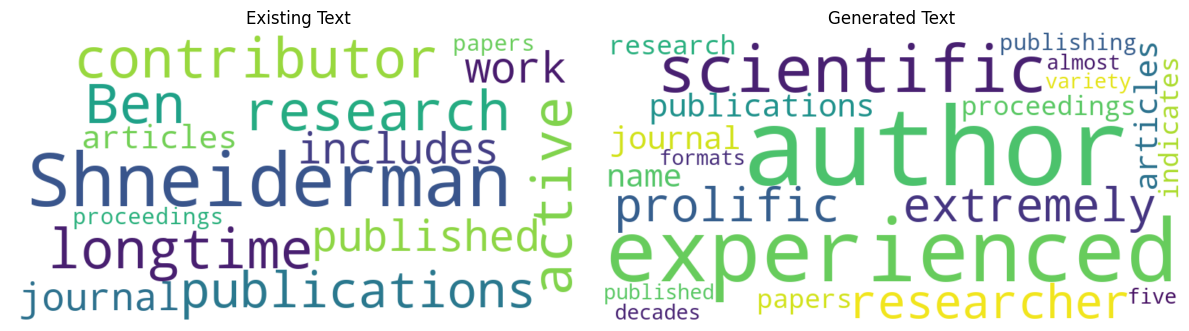

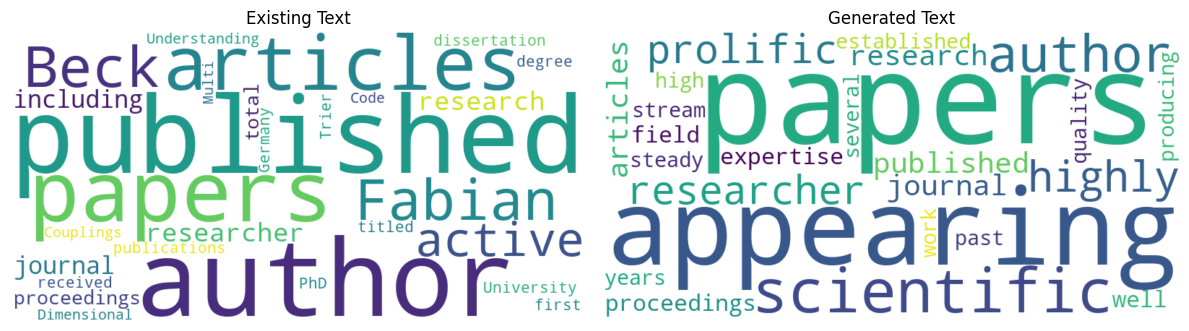

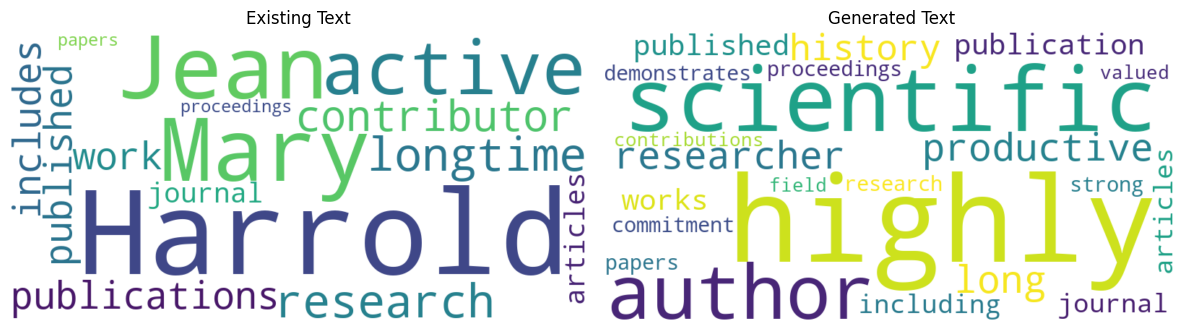

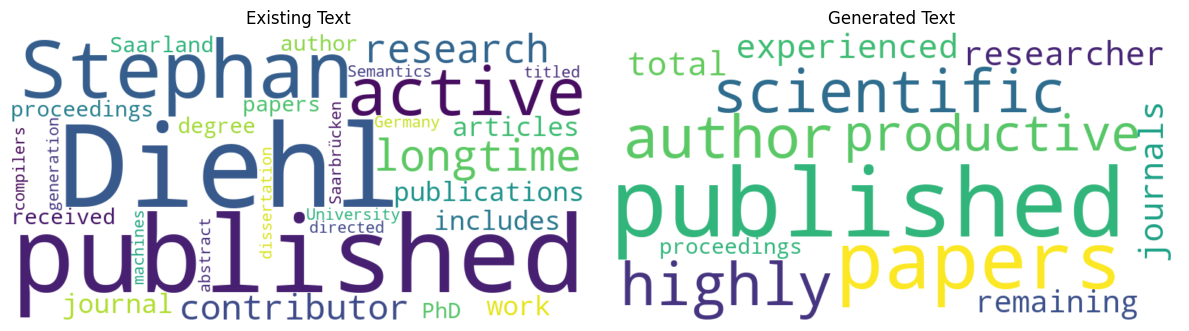

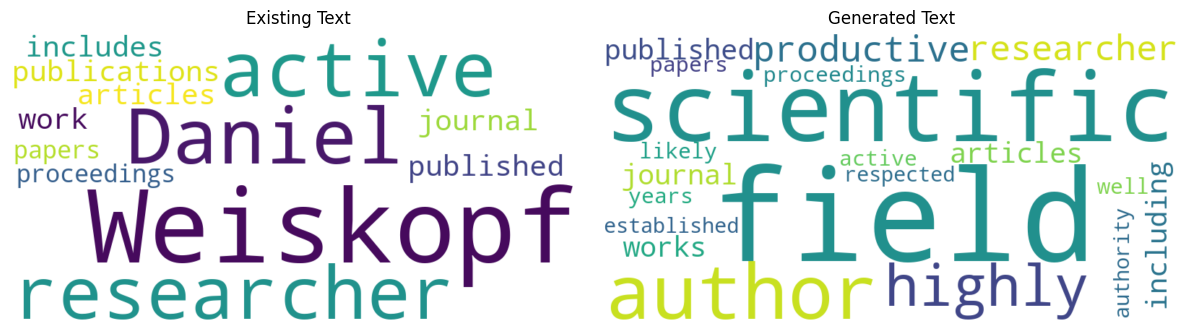

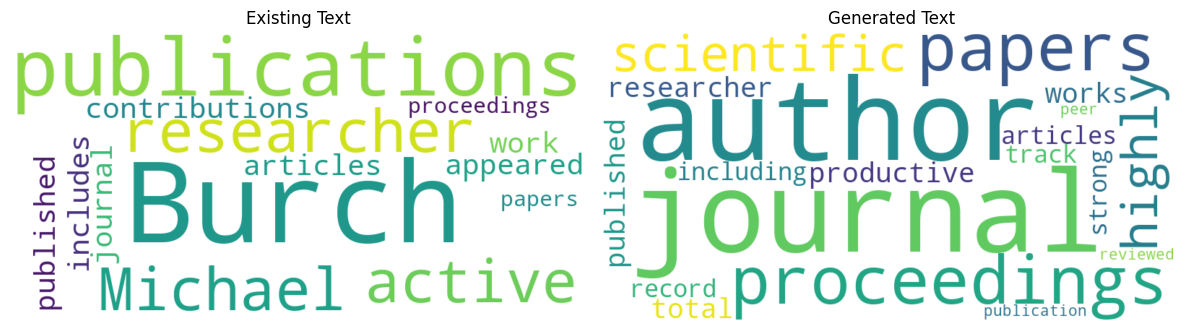

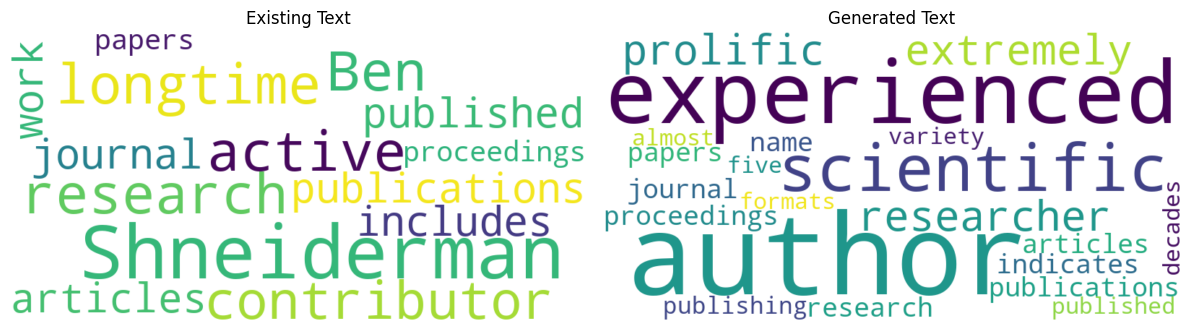

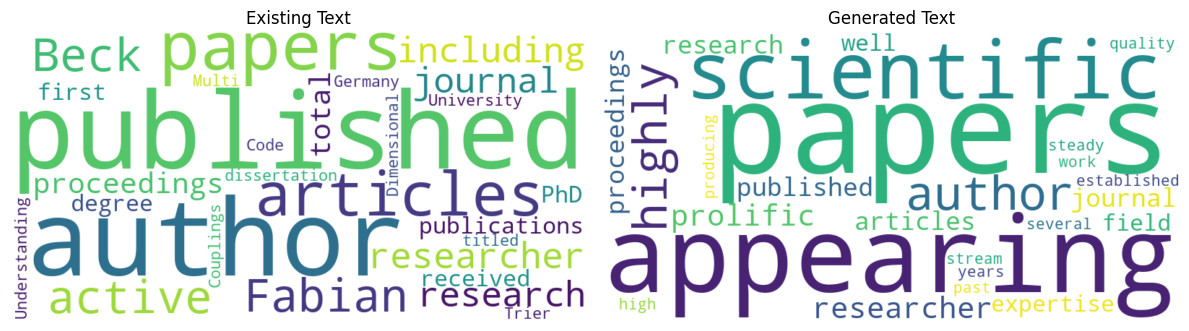

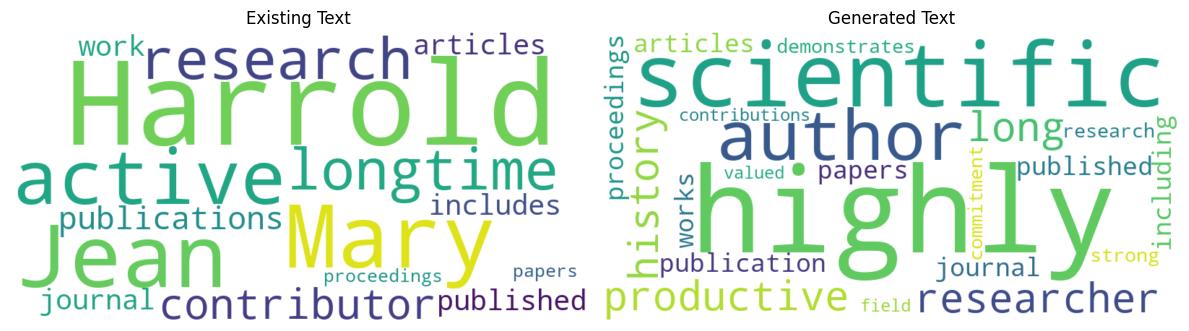

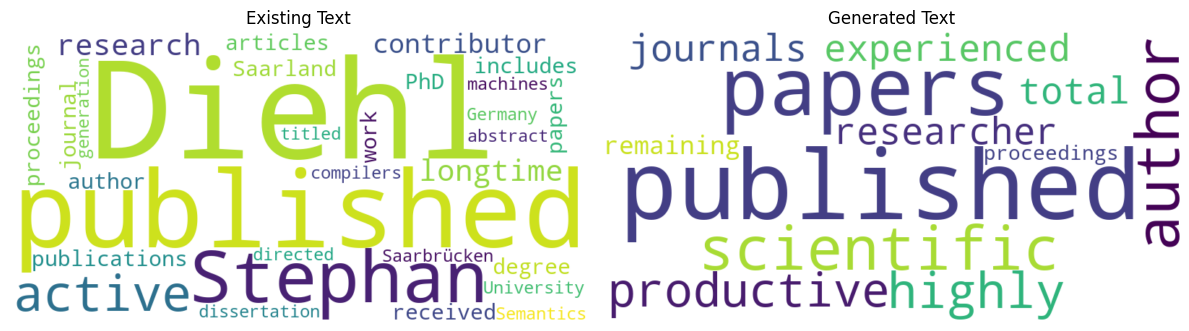

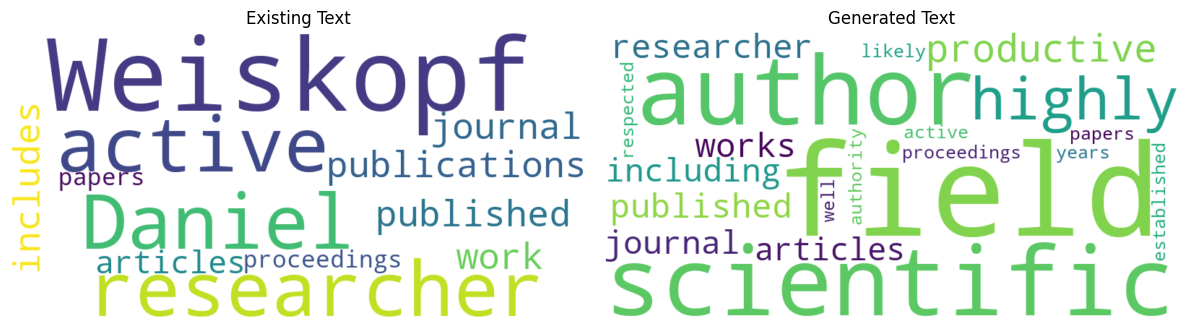

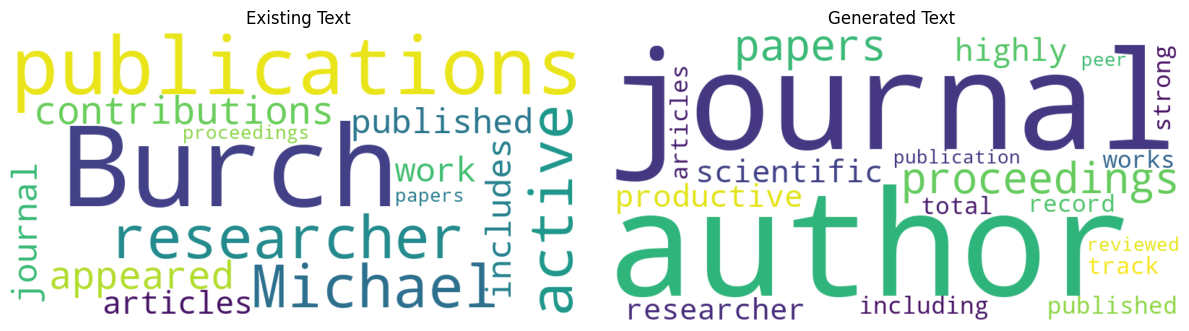

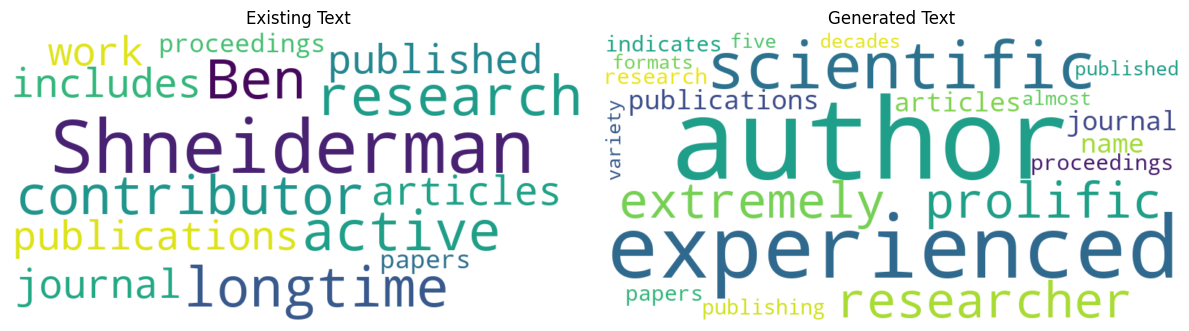

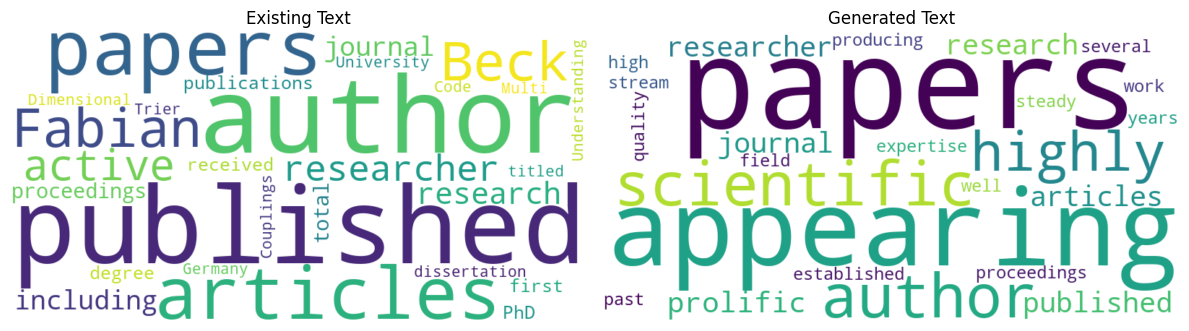

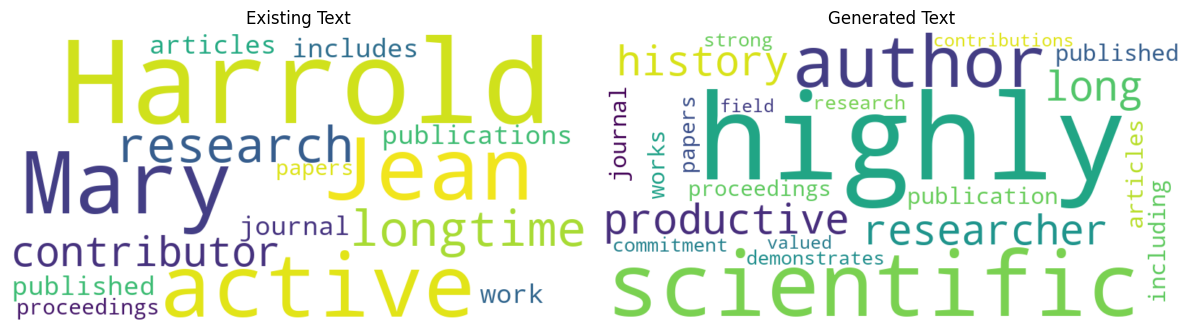

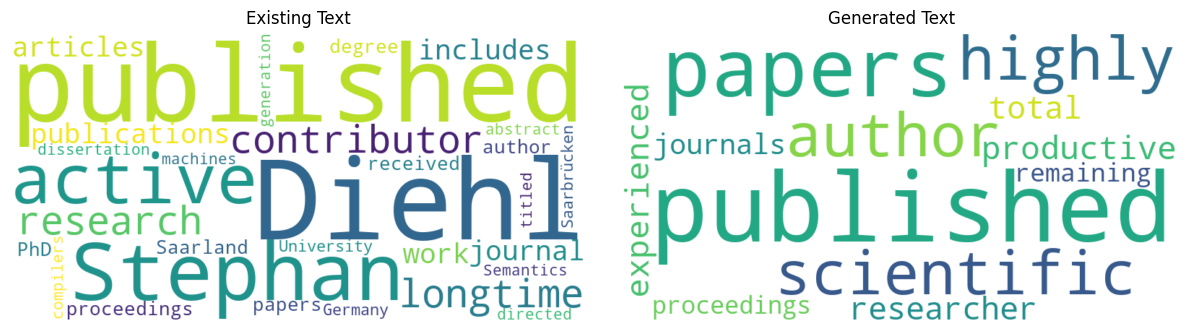

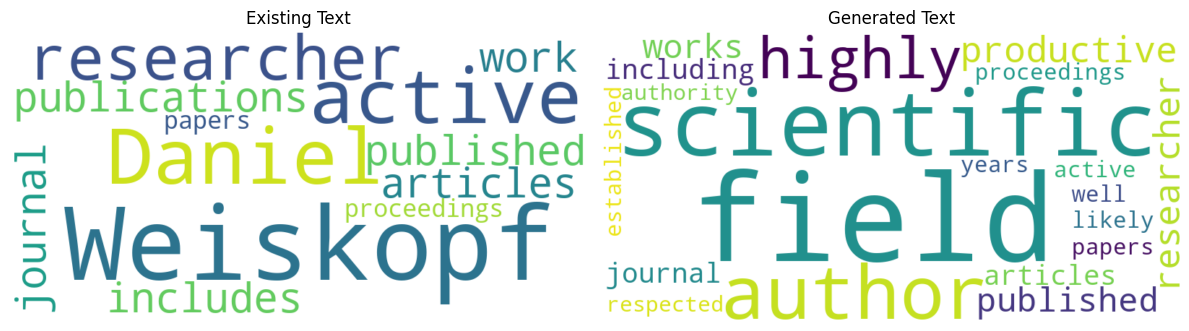

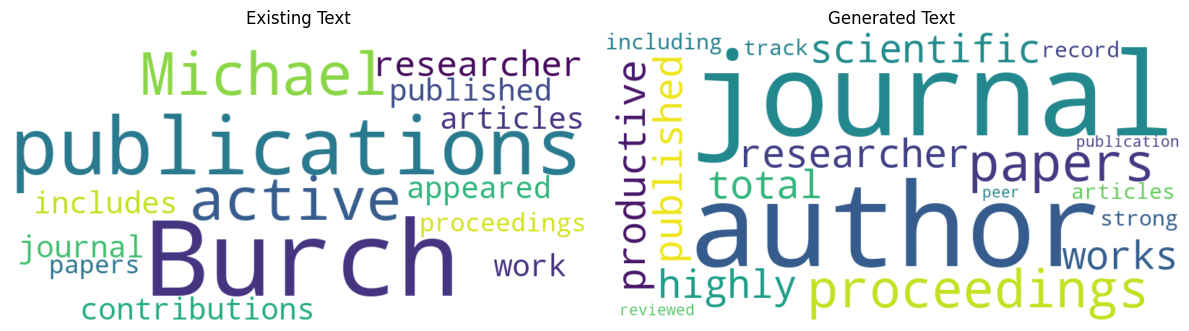

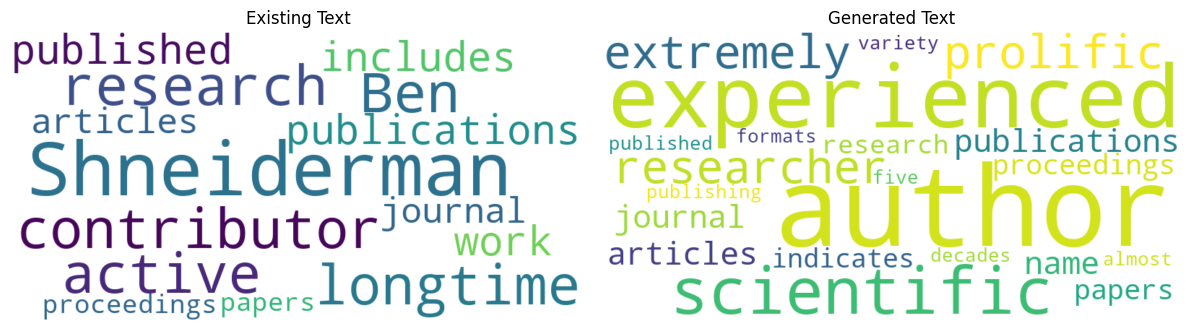

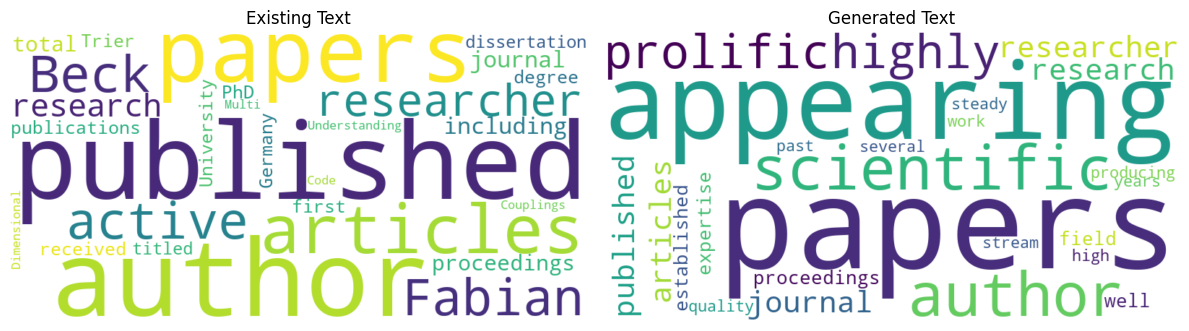

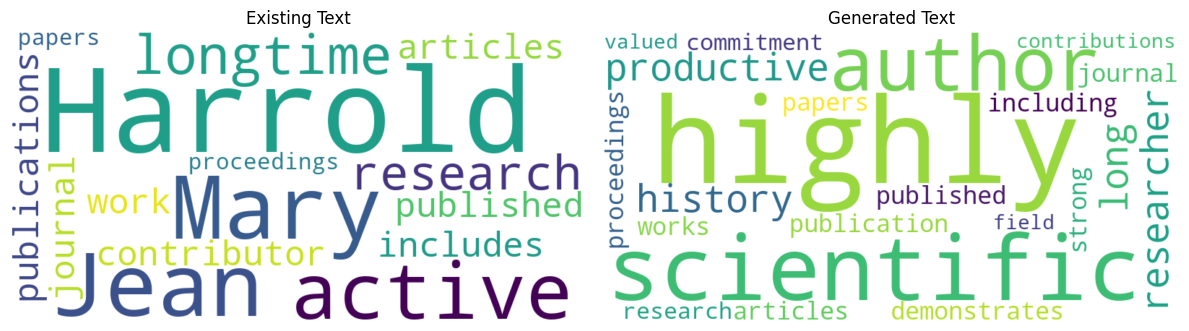

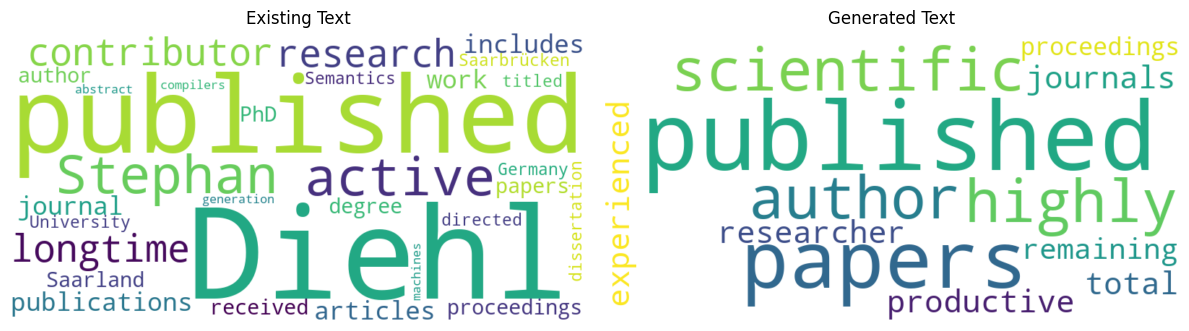

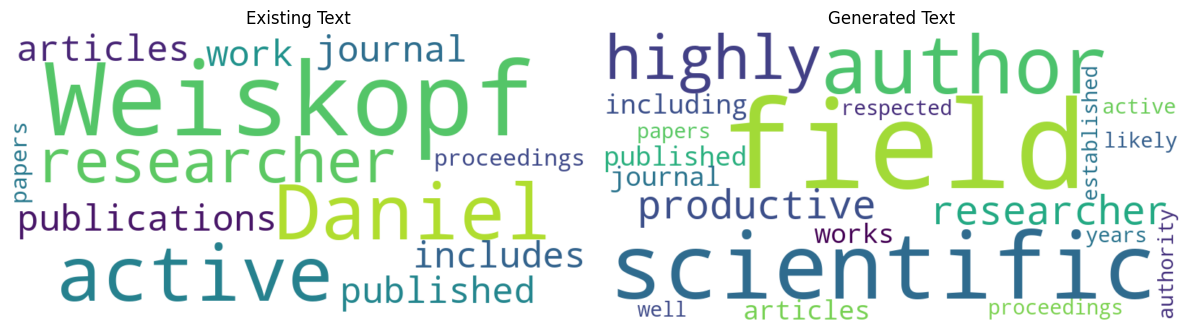

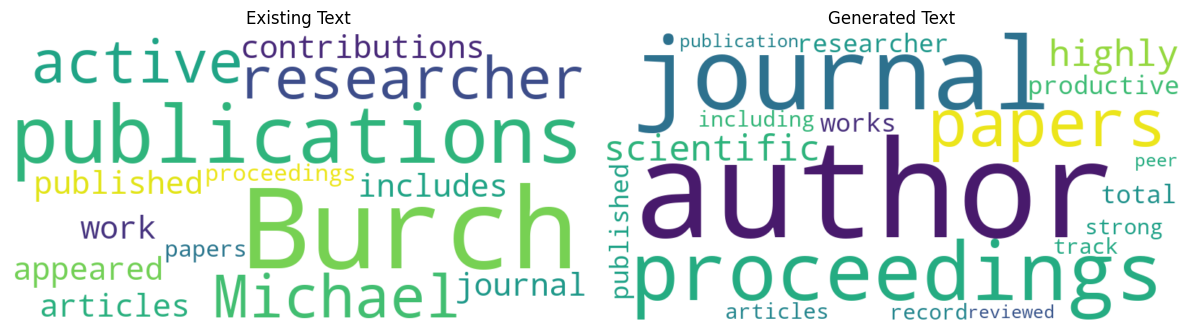

In [10]:
# Extract the existing and generated texts from the JSON data
for entry in data:
    existing_texts.append(entry['existing_text'])
    generated_texts.append(entry['generated_text1'])

# Generate word clouds for each pair of texts
for i in range(len(existing_texts)):
    existing_text = existing_texts[i]
    generated_text = generated_texts[i]

    # Generate word cloud for the existing text
    existing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(existing_text)

    # Generate word cloud for the generated text
    generated_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(generated_text)

    # Plot the word clouds
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(existing_wordcloud, interpolation='bilinear')
    axes[0].set_title('Existing Text')
    axes[0].axis('off')

    axes[1].imshow(generated_wordcloud, interpolation='bilinear')
    axes[1].set_title('Generated Text')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [13]:


existing_texts = [entry['existing_text'] for entry in data]
generated_texts = [entry['generated_text1'] for entry in data]

# Step 2: Define Tone Ranges
tone_ranges = {
    'neutral': (0.0, 0.2),
    'middle': (0.2, 0.4),
    'exaggerated': (0.4, 1.0)
}

# Step 3: Calculate Tone Metric for Each Entry
tone_metrics = []
for existing_text, generated_text in zip(existing_texts, generated_texts):
    existing_blob = TextBlob(existing_text)
    generated_blob = TextBlob(generated_text)

    existing_polarity = existing_blob.sentiment.polarity
    generated_polarity = generated_blob.sentiment.polarity

    tone_metric = None
    for tone, (lower, upper) in tone_ranges.items():
        if existing_polarity >= lower and existing_polarity < upper:
            tone_metric = tone
            break

    if generated_polarity >= upper:
        tone_metric = 'exaggerated'
    elif generated_polarity >= lower:
        tone_metric = 'middle'
    elif generated_polarity < lower:
        tone_metric = 'neutral'

    tone_metrics.append(tone_metric)

# Step 4: Count Tone Metrics for Each Entry
unique_tones = list(tone_ranges.keys())

# Step 5: Visualize the Tone Metrics
bar_width = 0.2
index = np.arange(len(unique_tones))

for i, entry in enumerate(entry_names):
    fig, ax = plt.subplots()
    ax.bar(index, counts_per_entry[i], bar_width)
    ax.set_xlabel('Tone')
    ax.set_ylabel('Count')
    ax.set_title(f'Tone Metrics Comparison for {entry}')
    ax.set_xticks(index)
    ax.set_xticklabels(unique_tones)
    plt.show()


NameError: name 'entry_names' is not defined